In [2]:
# Görev 1
import seaborn as sns
df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [7]:
cat_col = "abbrev"
["NUM_" + col.upper() if col not in cat_col else col.upper() for col in df.columns]

['NUM_TOTAL',
 'NUM_SPEEDING',
 'NUM_ALCOHOL',
 'NUM_NOT_DISTRACTED',
 'NUM_NO_PREVIOUS',
 'NUM_INS_PREMIUM',
 'NUM_INS_LOSSES',
 'ABBREV']

In [19]:
# Görev 2
[col.upper() if "no" in col else col.upper()+"_FLAG"  for col in df.columns]

['TOTAL_FLAG',
 'SPEEDING_FLAG',
 'ALCOHOL_FLAG',
 'NOT_DISTRACTED',
 'NO_PREVIOUS',
 'INS_PREMIUM_FLAG',
 'INS_LOSSES_FLAG',
 'ABBREV_FLAG']

In [22]:
# Görev 3
og_list = ["abbrev", "no_previous"]
new_cols = [col for col in df.columns if col not in og_list]
new_df = df[new_cols]
new_df.head()

,total,speeding,alcohol,not_distracted,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,784.55,145.08
1,18.1,7.421,4.525,16.290,1053.48,133.93
2,18.6,6.510,5.208,15.624,899.47,110.35
3,22.4,4.032,5.824,21.056,827.34,142.39
4,12.0,4.200,3.360,10.920,878.41,165.63


In [64]:
# Pandas alıştırmalar
##
##
# Görev1:
df = sns.load_dataset("titanic")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


male      577
female    314
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

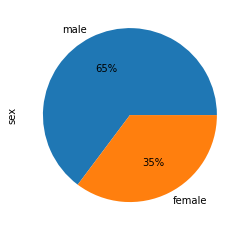

In [58]:
# Görev 3
print(df["sex"].value_counts())
df["sex"].value_counts().plot(kind="pie", autopct="%1.0f%%")

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


<AxesSubplot:>

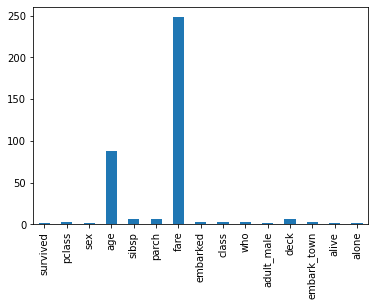

In [59]:
# Görev 3
print(df.nunique())
df.agg(lambda x: x.nunique()).plot(kind="bar")

In [60]:
# Görev 4:
df["pclass"].nunique()

3

In [61]:
# Görev 5:
df[["pclass", "parch"]].nunique()

pclass    3
parch     7
dtype: int64

In [65]:
# Görev 6:
print(df["embarked"].dtype)
df["embarked"] = df["embarked"].astype("category")
print(df["embarked"].dtype)

object
category


In [66]:
# Görev 7:
df.loc[df["embarked"]=="C"].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True


In [67]:
# Görev 8: 
df.loc[df["embarked"]=="S"].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [68]:
# Görev 9:
df.loc[(df["sex"]=="female") & (df["age"]<30)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True


In [69]:
# Görev 10:
df.loc[(df["fare"]>500) | (df["age"]>70)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True


In [70]:
# Görev 11:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
# Görev 12:
df.drop("who", axis=1, inplace=True)

In [74]:
# Görev 13:
df["deck"].fillna(df["deck"].mode()[0], inplace=True)

In [77]:
# Görev 14:
df["age"].fillna(df["age"].median(), inplace=True)

In [78]:
# Görev 15:
df.groupby(["pclass", "sex"]).agg({"survived": ["sum","count","mean"]})

survived                
                   sum count      mean
pclass sex                            
1      female       91    94  0.968085
       male         45   122  0.368852
2      female       70    76  0.921053
       male         17   108  0.157407
3      female       72   144  0.500000
       male         47   347  0.135447

In [81]:
# Görebv 16:
func = lambda x: 1 if x < 30 else 0
df["age_flag"] = df["age"].apply(func)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,age_flag
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True,0


In [82]:
# Görev 17:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
# Görev 18:
df.groupby("time").agg({"total_bill": ["sum", "min", "max", "mean"]})

total_bill                        
              sum   min    max       mean
time                                     
Lunch     1167.47  7.51  43.11  17.168676
Dinner    3660.30  3.07  50.81  20.797159

In [84]:
# Görev 19:
df.groupby(["time", "day"]).agg({"total_bill": ["sum", "min", "max", "mean"]})

total_bill                         
                   sum    min    max       mean
time   day                                     
Lunch  Thur    1077.55   7.51  43.11  17.664754
       Fri       89.92   8.58  16.27  12.845714
       Sat        0.00    NaN    NaN        NaN
       Sun        0.00    NaN    NaN        NaN
Dinner Thur      18.78  18.78  18.78  18.780000
       Fri      235.96   5.75  40.17  19.663333
       Sat     1778.40   3.07  50.81  20.441379
       Sun     1627.16   7.25  48.17  21.410000

In [86]:
# Görev 20:
df.loc[df["sex"]=="Female"].groupby("day").agg({"total_bill": ["min", "max", "mean"],
                                               "tip": ["min", "max", "mean"]})

total_bill                     tip                
            min    max       mean   min   max      mean
day                                                    
Thur       8.35  43.11  16.715312  1.25  5.17  2.575625
Fri        5.75  22.75  14.145556  1.00  4.30  2.781111
Sat        3.07  44.30  19.680357  1.00  6.50  2.801786
Sun        9.60  35.26  19.872222  1.01  5.20  3.367222

In [88]:
# Görev 21:
df.loc[(df["size"]<3) & (df["total_bill"]>10), "total_bill"].mean()

17.18496503496505

In [89]:
# Görev 22:
df["total_bill_tip"] = df["total_bill"] + df["tip"]

In [102]:
# Görev 23:
idx = df["total_bill_tip"].sort_values(ascending=False).head(30).index
top_customers = df.loc[idx,]
top_customers

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
170,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
212,48.33,9.00,Male,No,Sat,Dinner,4,57.33
59,48.27,6.73,Male,No,Sat,Dinner,4,55.00
156,48.17,5.00,Male,No,Sun,Dinner,6,53.17
182,45.35,3.50,Male,Yes,Sun,Dinner,3,48.85
197,43.11,5.00,Female,Yes,Thur,Lunch,4,48.11
23,39.42,7.58,Male,No,Sat,Dinner,4,47.00
102,44.30,2.50,Female,Yes,Sat,Dinner,3,46.80
142,41.19,5.00,Male,No,Thur,Lunch,5,46.19
95,40.17,4.73,Male,Yes,Fri,Dinner,4,44.90
